In [2]:
## CLUSTERING ALGORITHM

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [4]:
# Loading and Preprocessing Data
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=iris.target

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

iris_df.head(), iris_scaled.shape

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    species  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,
 (150, 5))

In [15]:
# Drop species column
new_dt = iris_df.drop(['species'], axis=1)
new_dt

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(new_dt)
iris_df['kmeans_cluster'] = kmeans.labels_

C:\Users\fari1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


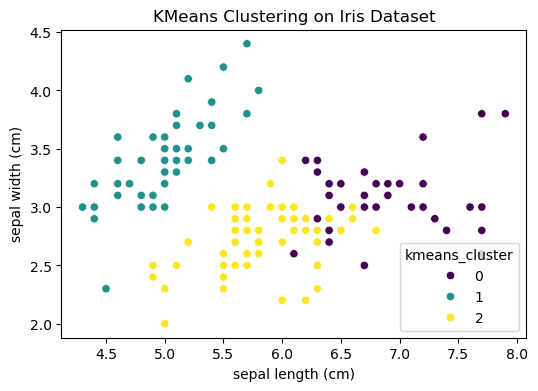

In [23]:
# Visualize KMeans Clustering

plt.figure(figsize=(6, 4))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['kmeans_cluster'], palette='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [29]:
# Hierarchical clustering

linkage_matrix = linkage(iris_df.iloc[:, :-1], method='ward')
iris_df['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

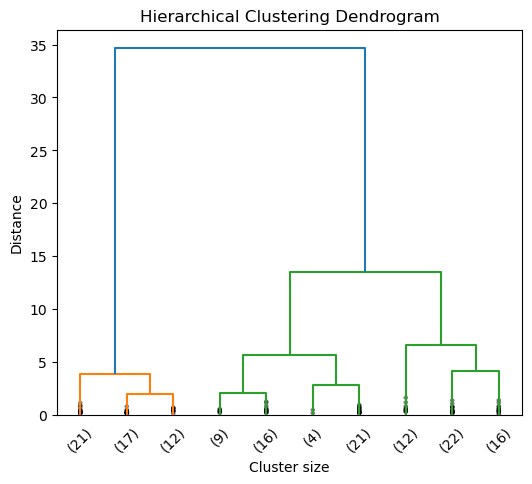

In [41]:
# Visualize the dendrogram
plt.figure(figsize=(6, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

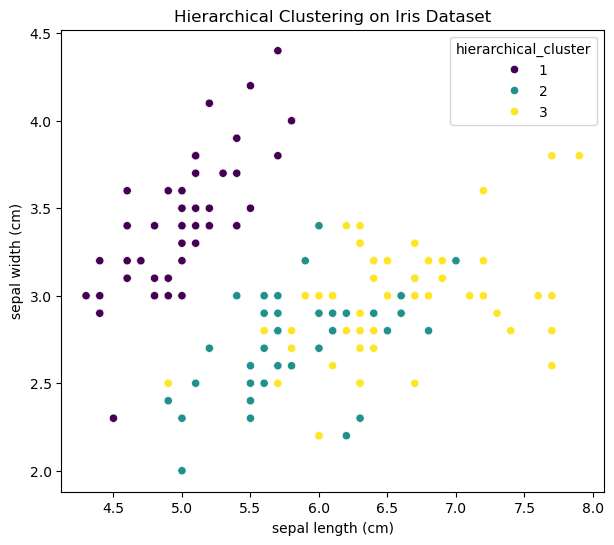

In [43]:
# Visualize the clusters (using first two features for simplicity)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['hierarchical_cluster'], palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

-------------------------------------------------- END---------------------------------------------------------